In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as mx
from sklearn.decomposition import PCA, SparsePCA, KernelPCA
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split,KFold, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import roc_curve, plot_roc_curve, confusion_matrix, roc_auc_score, f1_score, accuracy_score, balanced_accuracy_score, classification_report,RocCurveDisplay,auc
from sklearn.svm import SVC, LinearSVC, NuSVC, SVR, NuSVR, LinearSVR
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn.preprocessing import scale 

from numpy import mean, std

from sklearn.cluster import DBSCAN, OPTICS
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.inspection import permutation_importance


In [3]:
circRNA_HCC=pd.read_table('HCC_circRNAs.txt').T
circRNA_HCC.columns=circRNA_HCC.iloc[0]
circRNA_HCC=circRNA_HCC.iloc[1:,:]

circRNA_Healthy=pd.read_table('Healthy_circRNAs.txt').T
circRNA_Healthy.columns=circRNA_Healthy.iloc[0]
circRNA_Healthy=circRNA_Healthy.iloc[1:,:]


circRNA=pd.concat([circRNA_HCC,circRNA_Healthy],axis=0)

longRNA_HCC=pd.read_table('HCC_longRNAs.txt').T
longRNA_HCC.columns=longRNA_HCC.iloc[0]
longRNA_HCC=longRNA_HCC.iloc[1:,:]

longRNA_Healthy=pd.read_table('Healthy_longRNAs.txt').T
longRNA_Healthy.columns=longRNA_Healthy.iloc[0]
longRNA_Healthy=longRNA_Healthy.iloc[1:,:]

longRNA_HCC['Group']='1'
longRNA_Healthy['Group']='0'
longRNA=pd.concat([longRNA_HCC,longRNA_Healthy],axis=0)

full_data=pd.concat([circRNA,longRNA], axis=1, ignore_index=True)
full_data.columns=circRNA.columns.append(longRNA.columns)


In [4]:
Y=full_data.iloc[:,full_data.columns == 'Group']
X=full_data.iloc[:,full_data.columns != 'Group']

In [5]:
full_data

,exo_circ_29559,exo_circ_29560,exo_circ_29561,exo_circ_29562,exo_circ_29563,exo_circ_29564,exo_circ_29565,exo_circ_29566,exo_circ_29567,exo_circ_29568,...,AC009301.1,AC136297.1,AL157886.1,AL392086.3,AL357123.1,AL355312.5,AC120036.5,AC018931.1,AL731559.1,Group
HCC001,101.401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
HCC002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.507,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179,1
HCC003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
HCC004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
HCC005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Healthy114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Healthy115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Healthy116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Healthy117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
from sklearn.model_selection import train_test_split

X_tr, X_val, Y_tr, Y_val = train_test_split(X, Y, test_size= 0.20, random_state=1303,stratify=Y,shuffle = True)

In [6]:
Xtr_filtered=X_tr[['MTRNR2L8','PPBP','exo_circ_22106','ACTB','S100A9','TMSB4X','S100A11','FTL','exo_circ_79050']]
#top 10 dge: [['exo_circ_79050','exo_circ_79066','exo_circ_71478','exo_circ_11335', 'exo_circ_68977', 'exo_circ_38752','exo_circ_19955','exo_circ_71780','FGB']]




Xtr_filtered=Xtr_filtered.fillna(0)

In [7]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
Xtr_filtered_S= transformer.fit_transform(Xtr_filtered)

In [8]:
def modelPerformance(confMat):
    TN = confMat[0, 0]
    TP = confMat[1, 1]
    FP = confMat[0, 1]
    FN = confMat[1, 0]
    prec = TP / (TP + FP)
    rec = TP / (TP + FN)
    spec = TN / (TN + FP)
    fpr = FP / (TN + FP)
    f1 = 2 * (prec * rec) / (prec + rec)
    acc = (TP + TN) / (TP + FP + TN + FN)
    return (acc, prec, rec, spec, fpr, f1)

def printPerformance(confMat):
    acc, prec, rec, spec, fpr, f1 = modelPerformance(confMat)
    print("Accuracy = " "%.4f" % acc)
    print("Precision = " "%.4f" % prec)
    print("Recall = " "%.4f" % rec)
    print("Specificity = " "%.4f" % spec)
    print("False positive rate = " "%.4f" % fpr)
    print("F1-score = " "%.4f" % f1)
    np.set_printoptions(precision=2)
    print("Confusion matrix (%):")
    print(confMat/np.sum(confMat)*100)

In [9]:
parameters = {'solver': ['lbfgs','adam','sgd'], 'max_iter': [1000], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':[(100,200)] ,'random_state':[1303], 'activation':['tanh','relu','logistic']}


gridcv = GridSearchCV(MLPClassifier(), parameters, refit=True, cv=5, verbose=1, n_jobs=-1)


# fit the model for grid search 
gridcv.fit(Xtr_filtered_S, Y_tr) 
 
# display best parameters after tuning 
display(gridcv.best_params_) 


Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'activation': 'relu',
 'alpha': 1e-06,
 'hidden_layer_sizes': (100, 200),
 'max_iter': 1000,
 'random_state': 1303,
 'solver': 'lbfgs'}

C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated 

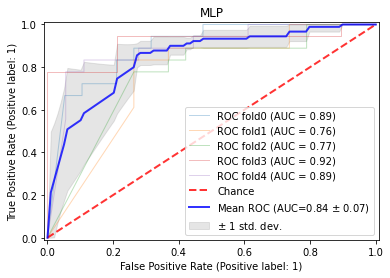

In [10]:
mlp = gridcv.best_estimator_
cv = StratifiedKFold(n_splits=5)

tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
cv = StratifiedKFold(n_splits=5)
fig,ax=plt.subplots()
for i, (train, test) in enumerate(cv.split(Xtr_filtered_S, Y_tr)):
    
    mlp.fit(Xtr_filtered_S[train],Y_tr.iloc[list(train)].values.ravel()).predict_proba(Xtr_filtered_S[test])
    vis=plot_roc_curve(mlp, Xtr_filtered_S[test],Y_tr.iloc[list(test)], name='ROC fold{}'.format(i),alpha=0.3,lw=1,ax=ax)
   
    tprs.append(np.interp(mean_fpr, vis.fpr, vis.tpr))
    tprs[-1][0]=0.0
    aucs.append(vis.roc_auc)
   
ax.plot([0,1],[0,1],linestyle='--', lw=2, color='r', label = 'Chance', alpha = 0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1]=1
mean_auc=auc(mean_fpr,mean_tpr)
std_auc=np.std(aucs)
ax.plot(mean_fpr,mean_tpr,color='b', label=r'Mean ROC (AUC=%0.2f $\pm$ %0.2f)' %(mean_auc,std_auc), lw=2, alpha=0.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr+std_tpr,1)
tprs_lower=np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper,color='grey',alpha= 0.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.01,1.01],ylim=[-0.01,1.01],title="MLP")
ax.legend(loc="lower right")
plt.show()


In [ ]:
param_grid_SVC = {'C': np.logspace(-2, 10, 13), 
              'random_state':[1303],
              'kernel':['linear','poly','rbf','sigmoid'],
              'gamma':['scale','auto']}

gridcv = GridSearchCV(SVC(), param_grid_SVC, refit=True, cv=5, verbose=1, n_jobs=-1)


# fit the model for grid search 
gridcv.fit(Xtr_filtered_S, Y_tr) 
 
# display best parameters after tuning 
display(gridcv.best_params_) 


In [11]:
clfSVC = SVC(
    C=10.0, 
    kernel='poly', 
    random_state = 1303,
    gamma = 'scale'
)


cv = StratifiedKFold(n_splits=5)
scores = ('accuracy','roc_auc')
output = pd.DataFrame(cross_validate(clfSVC, Xtr_filtered_S, Y_tr, scoring=scores, cv=cv, n_jobs=-1))
print(mean(output['test_roc_auc']))
mean((output['test_accuracy']))

0.9127680311890838


0.8647147147147148

C:\Users\e0998126.NUSSTU\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\e0998126.NUSSTU\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\e0998126.NUSSTU\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is depre

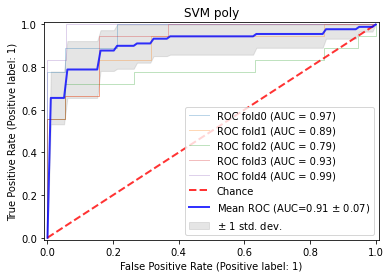

In [18]:
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
cv = StratifiedKFold(n_splits=5)
fig,ax=plt.subplots()
for i, (train, test) in enumerate(cv.split(Xtr_filtered_S, Y_tr)):
    
    clfSVC.fit(Xtr_filtered_S[train],Y_tr.iloc[list(train)].values.ravel())
    vis=plot_roc_curve(clfSVC, Xtr_filtered_S[test],Y_tr.iloc[list(test)], name='ROC fold{}'.format(i),alpha=0.3,lw=1,ax=ax)
   
    tprs.append(np.interp(mean_fpr, vis.fpr, vis.tpr))
    tprs[-1][0]=0.0
    aucs.append(vis.roc_auc)
   
ax.plot([0,1],[0,1],linestyle='--', lw=2, color='r', label = 'Chance', alpha = 0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1]=1
mean_auc=auc(mean_fpr,mean_tpr)
std_auc=np.std(aucs)
ax.plot(mean_fpr,mean_tpr,color='b', label=r'Mean ROC (AUC=%0.2f $\pm$ %0.2f)' %(mean_auc,std_auc), lw=2, alpha=0.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr+std_tpr,1)
tprs_lower=np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper,color='grey',alpha= 0.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.01,1.01],ylim=[-0.01,1.01],title="SVM poly")
ax.legend(loc="lower right")
plt.show()


In [12]:
n_estimators = [ 200, 1000, 7000]
max_depth = [5, 8]
min_samples_split = [2, 5, 15]
min_samples_leaf = [1, 2, 5] 
class_weight=['balanced_subsample']
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,class_weight=class_weight)

gridF = GridSearchCV(RandomForestClassifier(random_state = 1303), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
gridF.fit(Xtr_filtered_S, Y_tr)
display(gridF.best_params_) 

Fitting 3 folds for each of 54 candidates, totalling 162 fits


C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'class_weight': 'balanced_subsample',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 7000}

In [24]:
bestF = gridF.best_estimator_
scores = ('accuracy','roc_auc')
output = pd.DataFrame(cross_validate(bestF, Xtr_filtered_S, Y_tr, scoring=scores, cv=cv, n_jobs=-1))
print(mean(output['test_roc_auc']))
mean((output['test_accuracy']))

0.861143599740091


0.7882882882882883

C:\Users\e0998126.NUSSTU\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\e0998126.NUSSTU\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\e0998126.NUSSTU\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is depre

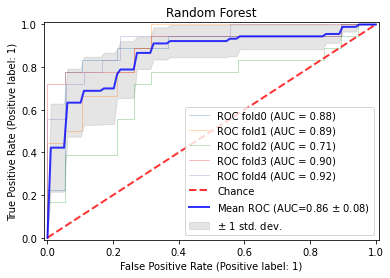

In [30]:
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
cv = StratifiedKFold(n_splits=5)
fig,ax=plt.subplots()
for i, (train, test) in enumerate(cv.split(Xtr_filtered_S, Y_tr)):
    
    bestF.fit(Xtr_filtered_S[train],Y_tr.iloc[list(train)].values.ravel())
    vis=plot_roc_curve(bestF, Xtr_filtered_S[test],Y_tr.iloc[list(test)], name='ROC fold{}'.format(i),alpha=0.3,lw=1,ax=ax)
   
    tprs.append(np.interp(mean_fpr, vis.fpr, vis.tpr))
    tprs[-1][0]=0.0
    aucs.append(vis.roc_auc)
   
ax.plot([0,1],[0,1],linestyle='--', lw=2, color='r', label = 'Chance', alpha = 0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1]=1
mean_auc=auc(mean_fpr,mean_tpr)
std_auc=np.std(aucs)
ax.plot(mean_fpr,mean_tpr,color='b', label=r'Mean ROC (AUC=%0.2f $\pm$ %0.2f)' %(mean_auc,std_auc), lw=2, alpha=0.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr+std_tpr,1)
tprs_lower=np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper,color='grey',alpha= 0.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.01,1.01],ylim=[-0.01,1.01],title="Random Forest")
ax.legend(loc="lower right")
plt.show()



In [13]:
from sklearn.linear_model import LogisticRegression

parameters = {'C': np.logspace(-2, 10, 13), 
              'random_state':[1303],
              'tol':np.logspace(-2, 10, 13)}


gridL = GridSearchCV(LogisticRegression(), parameters, cv = 5, verbose = 1, n_jobs = -1)
bestL = gridL.fit(Xtr_filtered_S, Y_tr)
display(bestL.best_params_) 
bestL.best_score_


Fitting 5 folds for each of 169 candidates, totalling 845 fits


C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 100.0, 'random_state': 1303, 'tol': 0.01}

0.8096096096096096

In [14]:

LogReg=bestL.best_estimator_
output=pd.DataFrame(cross_validate(LogReg,Xtr_filtered_S, Y_tr, scoring=['roc_auc','accuracy'],cv=cv,n_jobs=-1))
print(mean(output))


fit_time         0.007737
score_time       0.003762
test_roc_auc     0.871637
test_accuracy    0.809610
dtype: float64


C:\Users\Josephine Yap\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


C:\Users\e0998126.NUSSTU\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\e0998126.NUSSTU\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\e0998126.NUSSTU\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is depre

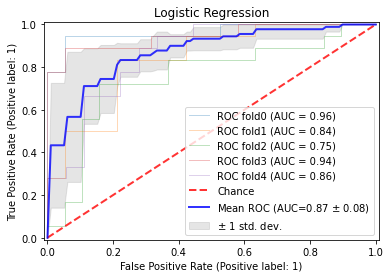

In [33]:
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
cv = StratifiedKFold(n_splits=5)
fig,ax=plt.subplots()
for i, (train, test) in enumerate(cv.split(Xtr_filtered_S, Y_tr)):
    
    LogReg.fit(Xtr_filtered_S[train],Y_tr.iloc[list(train)].values.ravel())
    vis=plot_roc_curve(LogReg, Xtr_filtered_S[test],Y_tr.iloc[list(test)], name='ROC fold{}'.format(i),alpha=0.3,lw=1,ax=ax)
   
    tprs.append(np.interp(mean_fpr, vis.fpr, vis.tpr))
    tprs[-1][0]=0.0
    aucs.append(vis.roc_auc)
   
ax.plot([0,1],[0,1],linestyle='--', lw=2, color='r', label = 'Chance', alpha = 0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1]=1
mean_auc=auc(mean_fpr,mean_tpr)
std_auc=np.std(aucs)
ax.plot(mean_fpr,mean_tpr,color='b', label=r'Mean ROC (AUC=%0.2f $\pm$ %0.2f)' %(mean_auc,std_auc), lw=2, alpha=0.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr+std_tpr,1)
tprs_lower=np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper,color='grey',alpha= 0.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.01,1.01],ylim=[-0.01,1.01],title="Logistic Regression")
ax.legend(loc="lower right")
plt.show()



In [15]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': range(1,100),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','l1','l2']}


gridN = GridSearchCV(KNeighborsClassifier(), parameters, cv = 5, verbose = 1, n_jobs = -1)
bestN = gridN.fit(Xtr_filtered_S, Y_tr)
display(bestN.best_params_) 
bestN.best_score_

Fitting 5 folds for each of 3168 candidates, totalling 15840 fits


C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 23,
 'weights': 'distance'}

0.81006006006006

C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated 

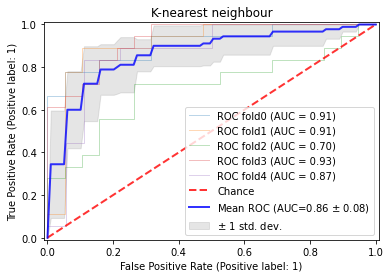

In [18]:
KNN=bestN.best_estimator_

tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
cv = StratifiedKFold(n_splits=5)
fig,ax=plt.subplots()
for i, (train, test) in enumerate(cv.split(Xtr_filtered_S, Y_tr)):
    
    KNN.fit(Xtr_filtered_S[train],Y_tr.iloc[list(train)].values.ravel())
    vis=plot_roc_curve(KNN, Xtr_filtered_S[test],Y_tr.iloc[list(test)], name='ROC fold{}'.format(i),alpha=0.3,lw=1,ax=ax)
   
    tprs.append(np.interp(mean_fpr, vis.fpr, vis.tpr))
    tprs[-1][0]=0.0
    aucs.append(vis.roc_auc)
   
ax.plot([0,1],[0,1],linestyle='--', lw=2, color='r', label = 'Chance', alpha = 0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1]=1
mean_auc=auc(mean_fpr,mean_tpr)
std_auc=np.std(aucs)
ax.plot(mean_fpr,mean_tpr,color='b', label=r'Mean ROC (AUC=%0.2f $\pm$ %0.2f)' %(mean_auc,std_auc), lw=2, alpha=0.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr+std_tpr,1)
tprs_lower=np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper,color='grey',alpha= 0.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.01,1.01],ylim=[-0.01,1.01],title="K-nearest neighbour")
ax.legend(loc="lower right")
plt.show()



In [19]:
from sklearn.naive_bayes import GaussianNB

parameters = {'var_smoothing': np.logspace(-2, 10, 13),}


gridG = GridSearchCV(GaussianNB(), parameters, cv = 5, verbose = 1, n_jobs = -1)
bestG = gridG.fit(Xtr_filtered_S, Y_tr)
display(bestN.best_params_) 
bestG.best_score_

Fitting 5 folds for each of 13 candidates, totalling 65 fits


C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 23,
 'weights': 'distance'}

0.8094594594594595

C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated 

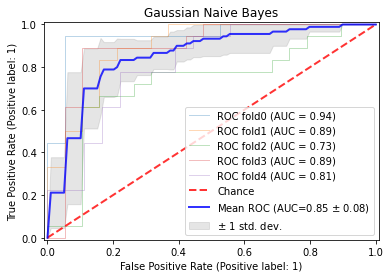

In [20]:
from sklearn.naive_bayes import GaussianNB

GNB=bestG.best_estimator_

tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
cv = StratifiedKFold(n_splits=5)
fig,ax=plt.subplots()
for i, (train, test) in enumerate(cv.split(Xtr_filtered_S, Y_tr)):
    
    GNB.fit(Xtr_filtered_S[train],Y_tr.iloc[list(train)].values.ravel())
    vis=plot_roc_curve(GNB, Xtr_filtered_S[test],Y_tr.iloc[list(test)], name='ROC fold{}'.format(i),alpha=0.3,lw=1,ax=ax)
   
    tprs.append(np.interp(mean_fpr, vis.fpr, vis.tpr))
    tprs[-1][0]=0.0
    aucs.append(vis.roc_auc)
   
ax.plot([0,1],[0,1],linestyle='--', lw=2, color='r', label = 'Chance', alpha = 0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1]=1
mean_auc=auc(mean_fpr,mean_tpr)
std_auc=np.std(aucs)
ax.plot(mean_fpr,mean_tpr,color='b', label=r'Mean ROC (AUC=%0.2f $\pm$ %0.2f)' %(mean_auc,std_auc), lw=2, alpha=0.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr+std_tpr,1)
tprs_lower=np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper,color='grey',alpha= 0.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.01,1.01],ylim=[-0.01,1.01],title="Gaussian Naive Bayes")
ax.legend(loc="lower right")
plt.show()



C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Josephine Yap\AppData\Local\Temp\ipykernel_9572\3473426104.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bestF.fit(Xtr_filtered_S, Y_tr)
C:\Users\Josephine Yap\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

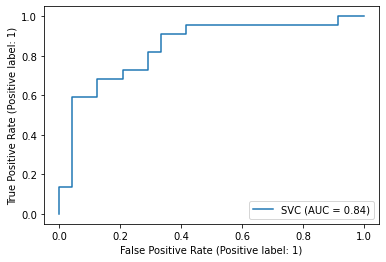

Accuracy = 0.7609
Precision = 0.7895
Recall = 0.6818
Specificity = 0.8333
False positive rate = 0.1667
F1-score = 0.7317
Confusion matrix (%):
[[43.48  8.7 ]
 [15.22 32.61]]


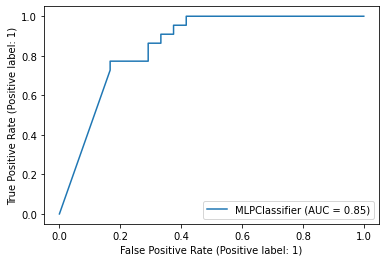

Accuracy = 0.7609
Precision = 0.7391
Recall = 0.7727
Specificity = 0.7500
False positive rate = 0.2500
F1-score = 0.7556
Confusion matrix (%):
[[39.13 13.04]
 [10.87 36.96]]


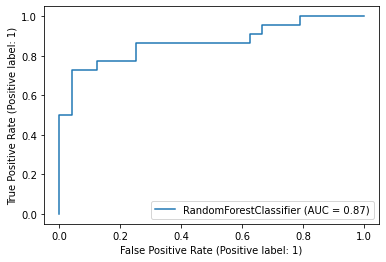

Accuracy = 0.8478
Precision = 0.9412
Recall = 0.7273
Specificity = 0.9583
False positive rate = 0.0417
F1-score = 0.8205
Confusion matrix (%):
[[50.    2.17]
 [13.04 34.78]]


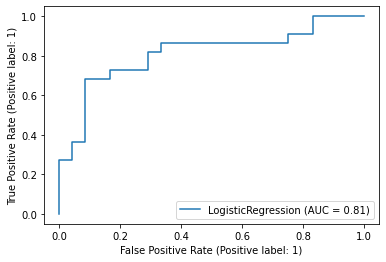

Accuracy = 0.7826
Precision = 0.8333
Recall = 0.6818
Specificity = 0.8750
False positive rate = 0.1250
F1-score = 0.7500
Confusion matrix (%):
[[45.65  6.52]
 [15.22 32.61]]


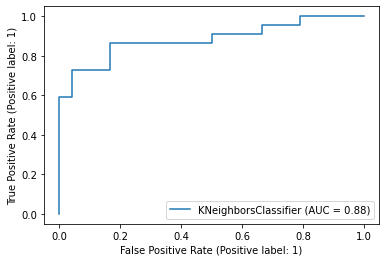

Accuracy = 0.8478
Precision = 0.9412
Recall = 0.7273
Specificity = 0.9583
False positive rate = 0.0417
F1-score = 0.8205
Confusion matrix (%):
[[50.    2.17]
 [13.04 34.78]]


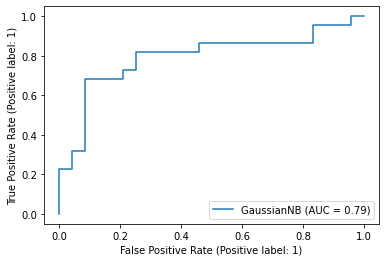

Accuracy = 0.7609
Precision = 0.8667
Recall = 0.5909
Specificity = 0.9167
False positive rate = 0.0833
F1-score = 0.7027
Confusion matrix (%):
[[47.83  4.35]
 [19.57 28.26]]


In [25]:
#final unseen test
X_TEST=X_val[['MTRNR2L8','PPBP','exo_circ_22106','ACTB','S100A9','TMSB4X','S100A11','FTL','exo_circ_79050']]
XTEST_S = transformer.transform(X_TEST)

clfSVC.fit(Xtr_filtered_S, Y_tr) 
mlp.fit(Xtr_filtered_S, Y_tr)
bestF.fit(Xtr_filtered_S, Y_tr)
LogReg.fit(Xtr_filtered_S, Y_tr)
KNN.fit(Xtr_filtered_S, Y_tr)
GNB.fit(Xtr_filtered_S, Y_tr)

SVM_pred = clfSVC.predict(XTEST_S)
RocCurveDisplay.from_estimator(clfSVC,XTEST_S,Y_val)
ax.set(title="SVM (poly)")

plt.show()
cmat = confusion_matrix(Y_val, SVM_pred)
printPerformance(cmat)

MLP_pred = mlp.predict(XTEST_S)
RocCurveDisplay.from_estimator(mlp,XTEST_S,Y_val)
ax.set(title="MLP")
plt.show()
cmat = confusion_matrix(Y_val, MLP_pred)
printPerformance(cmat)

RF_pred = bestF.predict(XTEST_S)
RocCurveDisplay.from_estimator(bestF,XTEST_S,Y_val)
ax.set(title="Random Forest")
plt.show()
cmat = confusion_matrix(Y_val, RF_pred)
printPerformance(cmat)

LogReg_pred = LogReg.predict(XTEST_S)
RocCurveDisplay.from_estimator(LogReg,XTEST_S,Y_val)
ax.set(title="Logistic Regression")
plt.show()
cmat = confusion_matrix(Y_val, LogReg_pred)
printPerformance(cmat)

KNN_pred = KNN.predict(XTEST_S)
RocCurveDisplay.from_estimator(KNN,XTEST_S,Y_val)
ax.set(title="K Nearest Neighbour")
plt.show()
cmat = confusion_matrix(Y_val, KNN_pred)
printPerformance(cmat)

GNB_pred = GNB.predict(XTEST_S)
RocCurveDisplay.from_estimator(GNB,XTEST_S,Y_val)
ax.set(title="Gaussian Naive Bayes")
plt.show()
cmat = confusion_matrix(Y_val, GNB_pred)
printPerformance(cmat)

In [50]:
print(clfSVC)
print(mlp)
print(bestF)
print(LogReg)
print(KNN)
print(GNB)

SVC(C=10.0, kernel='poly', random_state=1303)
MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 200), max_iter=1000,
              random_state=1303)
RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       min_samples_split=15, n_estimators=7000,
                       random_state=1303)
LogisticRegression(C=100.0, random_state=1303, tol=0.01)
KNeighborsClassifier(metric='euclidean', n_neighbors=23, weights='distance')
GaussianNB(var_smoothing=0.01)


In [42]:
from sklearn.model_selection import permutation_test_score
score_SVM, perm_scores_SVM, pvalue_SVM = permutation_test_score(
    clfSVC,Xtr_filtered_S, np.ravel(Y_tr), scoring="accuracy", cv=cv, n_permutations=1000
)

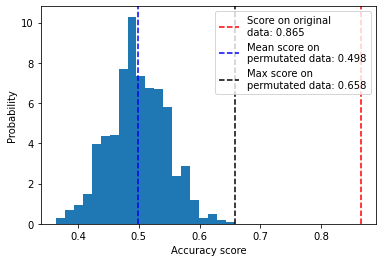

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_SVM, bins=20, density=True)
ax.axvline(score_SVM, ls="--", color="r",label=f"Score on original\ndata: {score_SVM:.3f}")
ax.axvline(mean(perm_scores_SVM), ls="--", color="b", label=f"Mean score on \npermutated data: {mean(perm_scores_SVM):.3f}")
ax.axvline(max(perm_scores_SVM), ls="--", color="black", label=f"Max score on \npermutated data: {max(perm_scores_SVM):.3f}")

#ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")
ax.legend(loc="upper right")


In [47]:
pvalue_SVM


0.000999000999000999

In [ ]:
from sklearn.model_selection import permutation_test_score
score_R, perm_scores_R, pvalue_R = permutation_test_score(
    bestF,XTEST_S,Y_val, scoring="accuracy", cv=cv, n_permutations=10
)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_R, density=True)
ax.axvline(score_R, ls="--", color="r",)
score_label = f"Score on original\ndata: {score_R:.2f}\n(p-value: {pvalue_R:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")
